# 1 - Import de Librerías

In [227]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from datetime import datetime
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 2 - Carga de Datos

In [228]:
df = pd.read_csv('./DatasetModulo2.csv')

In [229]:
df.head()

,FechaSaldos,periodo_cli,periodo,cant_productos,cant_PF,cant_TC,cant_PP,FechaUltMovCA,cant_seguros,importe_consumos,Edad,Sexo,SaldoPromedioCAPesos,SaldoPromedioCADolares,SaldoPromedioCCAcreedor,TotalConsumoTD,TipoCuentaAcredHab,CategoriaProducto,FechaVinculacion,cuotas_faltantes_1,cant_PF_ant_1,cant_TC_ant_1,cant_PP_ant_1,SaldoPromedioCAPesos_ant_1,SaldoPromedioCADolares_ant_1,SaldoPromedioCCAcreedor_ant_1,importe_consumos_ant_1,TotalConsumoTD_ant_1,cuotas_faltantes,cant_PF_ant_2,cant_TC_ant_2,cant_PP_ant_2,SaldoPromedioCAPesos_ant_2,SaldoPromedioCADolares_ant_2,SaldoPromedioCCAcreedor_ant_2,importe_consumos_ant_2,TotalConsumoTD_ant_2,cuotas_faltantes_2,score_deuda,target,target2
0,2019-12-06 09:45:00,0,0,2,0,0,0,2019-12-02 00:00:00,0,0,68,M,6784.50,0.00,0.0,2838.24,0,12,2017-07-26 00:00:00,0,0,0,0,4828.38,0.00,0.0,0,5872.82,0,0,0,0,9440.56,0.00,0.0,0,4577.00,0,NaN,0.0,0.0
1,2019-12-06 09:45:00,0,0,1,0,0,0,2019-12-04 00:00:00,0,0,67,F,9231.10,0.00,0.0,6244.15,0,12,2015-09-25 00:00:00,0,0,0,0,7685.18,0.00,0.0,0,6478.19,0,0,0,0,5029.59,0.00,0.0,0,8813.89,0,NaN,0.0,0.0
2,2019-12-06 09:45:00,0,0,1,0,0,0,2019-12-05 00:00:00,1,0,68,F,47496.61,0.00,0.0,15580.71,0,12,NaN,0,0,0,0,53765.76,0.00,0.0,0,17950.29,0,0,0,0,50156.32,0.00,0.0,0,10387.20,0,0.0,0.0,0.0
3,2019-12-06 09:45:00,0,0,6,0,3,0,2019-12-05 00:00:00,1,0,68,F,24806.59,0.00,0.0,5335.68,0,12,NaN,0,0,3,0,40815.30,0.00,0.0,0,6714.54,0,0,3,0,26082.85,0.00,0.0,0,600.00,0,1.0,0.0,0.0
4,2019-12-06 09:45:00,0,0,6,1,2,0,2019-12-05 00:00:00,1,0,67,F,75824.78,470.04,0.0,183.16,0,14,NaN,0,1,2,0,75026.28,470.04,0.0,0,0.00,0,1,2,0,103080.40,470.04,0.0,0,1618.19,0,0.0,0.0,1.0


In [230]:
pd.set_option('display.max_columns',500)

# 3 - EDA

### Nulos

#### Funciones Necesarias

In [231]:
def get_norm_nulls(df):
    # Guardamos en {'nombre_columna_1': cantidad_nulls_1, 'nombre_columna_2': cantidad_nulls_2, ...}  
    null_count = { col:df[col].isnull().sum() for col in df.columns }
    # Convierten los valores en una serie:
    missing = pd.Series(null_count)
    # Calculamos la cantidad de filas de nuestro df
    total_rows = df.shape[0]
    #  Filtramos en donde tenemos solamente valores nulls y mostramos el grafico de barras.
    return missing[ missing > 0 ].div(total_rows)

In [232]:
def impute_nulls( df, col_name, value = None ):
    value_counts = df[col_name].value_counts()
    moda = value_counts.index[0]
    df.loc[ fulldata[col_name].isnull(), col_name ] =  ( moda if value is None else value)

#### Busqueda de Nulos

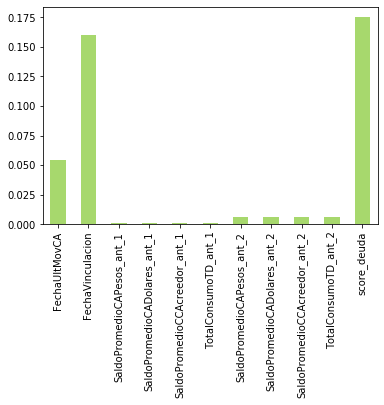

In [233]:
get_norm_nulls(df).plot.bar(color=['#a7d86d'])

#### Score Deuda

In [234]:
df.score_deuda.value_counts(dropna = False)

1.0    346020
NaN     86641
0.0     52119
2.0      4415
3.0      2705
4.0      1626
5.0      1361
Name: score_deuda, dtype: int64

In [235]:
df.score_deuda.fillna(0,inplace=True) #Probar con 1 que es la moda... ???

In [236]:
df.score_deuda.value_counts(dropna = False)

1.0    346020
0.0    138760
2.0      4415
3.0      2705
4.0      1626
5.0      1361
Name: score_deuda, dtype: int64

 #### Fecha Ultimo Movimiento Caja de Ahorros

In [237]:
df['FechaUltMovCA'] = pd.to_datetime(df['FechaUltMovCA'])

In [238]:
df['FechaUltMovCA'].value_counts(normalize = True, dropna = False)

2019-12-05    0.206100
2019-12-04    0.078818
2019-02-15    0.066122
NaT           0.053998
2019-12-03    0.046396
                ...   
2014-02-13    0.000002
2016-06-22    0.000002
2015-01-20    0.000002
2014-02-28    0.000002
2016-12-02    0.000002
Name: FechaUltMovCA, Length: 972, dtype: float64

In [239]:
df['FechaUltMovCA'].mode()

0   2019-12-05
dtype: datetime64[ns]

In [240]:
df['FechaUltMovCA'].describe()

count                  468164
unique                    971
top       2019-12-05 00:00:00
freq                   101996
first     2004-04-19 00:00:00
last      2020-02-06 00:00:00
Name: FechaUltMovCA, dtype: object

In [241]:
df['FechaVinculacion'].value_counts(normalize = True, dropna = False)

NaN                    0.160166
2017-08-07 00:00:00    0.014520
2010-03-04 00:00:00    0.013969
2016-05-23 00:00:00    0.003191
2017-04-20 00:00:00    0.003045
                         ...   
2010-08-08 00:00:00    0.000002
2020-01-07 00:00:00    0.000002
2020-01-13 00:00:00    0.000002
2012-09-12 00:00:00    0.000002
2020-01-14 00:00:00    0.000002
Name: FechaVinculacion, Length: 5135, dtype: float64

In [242]:
 df.loc[df['FechaUltMovCA'].isna(),'FechaUltMovCA']=pd.to_datetime('2019-09-20') #Porque esta fecha??

#### Fecha de Vinculacion

In [243]:
df['FechaVinculacion'] = pd.to_datetime(df['FechaVinculacion'])

In [244]:
df[df['FechaVinculacion'].isna()]['target2'].value_counts()

0.0    46403
1.0    32861
Name: target2, dtype: int64

In [245]:
(df.FechaVinculacion.dt.year - datetime.now().year)

0        -3.0
1        -5.0
2         NaN
3         NaN
4         NaN
         ... 
494882   -6.0
494883   -4.0
494884   -2.0
494885   -2.0
494886   -1.0
Name: FechaVinculacion, Length: 494887, dtype: float64

In [246]:
df['antiguedad']=(df.FechaVinculacion.dt.year - datetime.now().year)*-1

In [247]:
df.loc[df['antiguedad'].isna(),'antiguedad']=df.antiguedad.mean()

In [248]:
df.drop(columns='FechaVinculacion',inplace=True)

Con fecha de vinculación creamos una variable nueva llamada Antiguedad, luego eliminamos nuestra columna FechaVinculacion.

#### Saldos Promedios y Total de consumos

A estas columnas se decida asignarle a cada nulo el valor de 0.

In [249]:
df.fillna(0,inplace=True)

En este punto ya no tenemos nulos en nuestro DataSet.

### Faltantes y Erroneos.

#### Sexo

In [250]:
df.Sexo.value_counts(dropna=False)

F    277632
M    215313
       1942
Name: Sexo, dtype: int64

In [251]:
df.Sexo = df.Sexo.str.replace(' ','Na')

Se asigna a los no especificados el nombre Na.

#### Categoria de producto

In [252]:
df.CategoriaProducto.value_counts(normalize=True,dropna=False)

14    0.517437
10    0.208884
12    0.177483
28    0.031868
19    0.020118
18    0.015377
3     0.007640
15    0.004710
9     0.002942
26    0.002762
27    0.002754
22    0.002750
7     0.001473
16    0.001113
6     0.000705
23    0.000430
13    0.000309
25    0.000299
20    0.000293
17    0.000228
5     0.000133
11    0.000109
1     0.000079
4     0.000034
24    0.000024
8     0.000016
2     0.000012
21    0.000010
0     0.000004
Name: CategoriaProducto, dtype: float64

Se observa que casi el 90% de los datos se concentran en 3 valores. Nos quedamos con estos 3 valores y los demas se asignan a una nueva variable llamada 'OTH' (others).

In [253]:
to_keep = df.CategoriaProducto.value_counts(normalize=True,dropna=False)[:3].index

In [254]:
df.CategoriaProducto.fillna('OTH',inplace=True)

In [255]:
df.CategoriaProducto = df.CategoriaProducto.apply(lambda x:'OTH' if x not in to_keep else x)

In [256]:
df.CategoriaProducto.value_counts()

14     256073
10     103374
12      87834
OTH     47606
Name: CategoriaProducto, dtype: int64

#### Target 1

In [257]:
df['target'].value_counts()

0.0    491817
1.0      3070
Name: target, dtype: int64

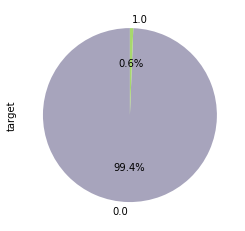

In [258]:
colors = ['#a7a4bc', '#a7d86d']
ax = df['target'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)

Se observa que la distribucion es muy despareja, por lo que no podemos trabajar con dicho target. Se procede a eliminarlo.

In [259]:
df.drop(columns='target',inplace=True)

#### Target 2

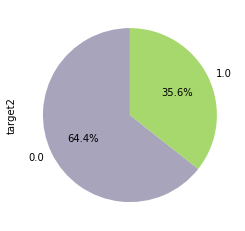

In [260]:
colors = ['#a7a4bc', '#a7d86d']
ax = df['target2'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)

### Outliers

#### Funciones

In [261]:
def outlier_treatment(df):
    numerical_columns = df.select_dtypes(include=['int32','int64', 'float64']).columns
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        df.loc[ df[column] > (1.5*IQR), column ] = ( 1.5*IQR )
        df.loc[ df[column] < (-1.5*IQR), column] = ( -1.5*IQR )  

#### Analisis por columna

In [262]:
columnas_numericas = list()

In [263]:
for col in df.select_dtypes('number').columns:
    columnas_numericas.append(col)

len(columnas_numericas)

36

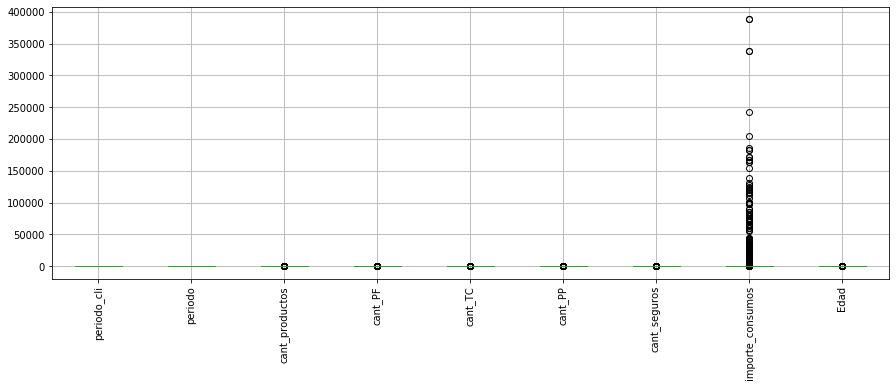

In [264]:
df.boxplot(columnas_numericas[0:9],rot = 90, figsize=(15,5))

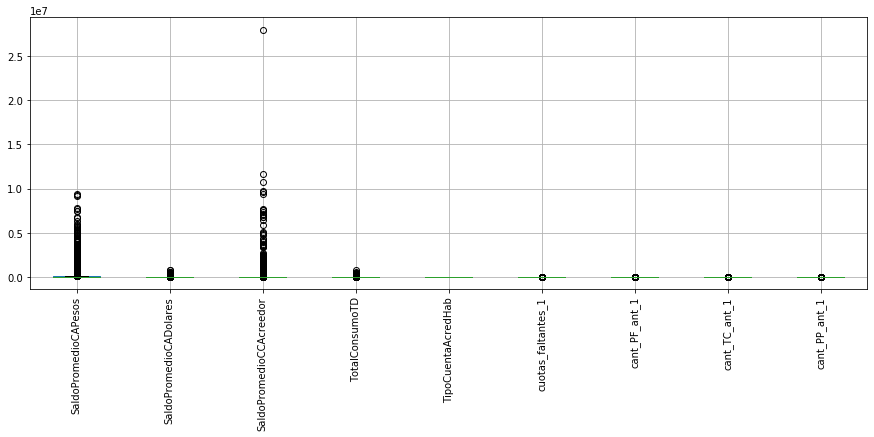

In [265]:
df.boxplot(columnas_numericas[9:18],rot = 90, figsize=(15,5))

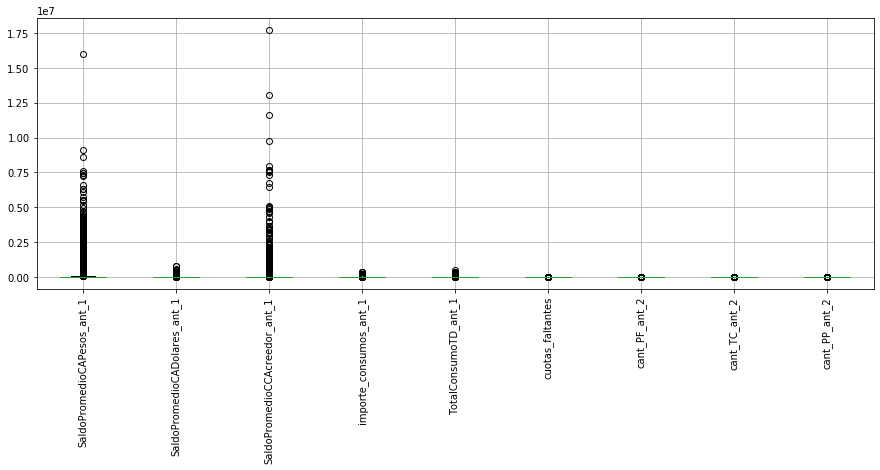

In [266]:
df.boxplot(columnas_numericas[18:27],rot = 90, figsize=(15,5))

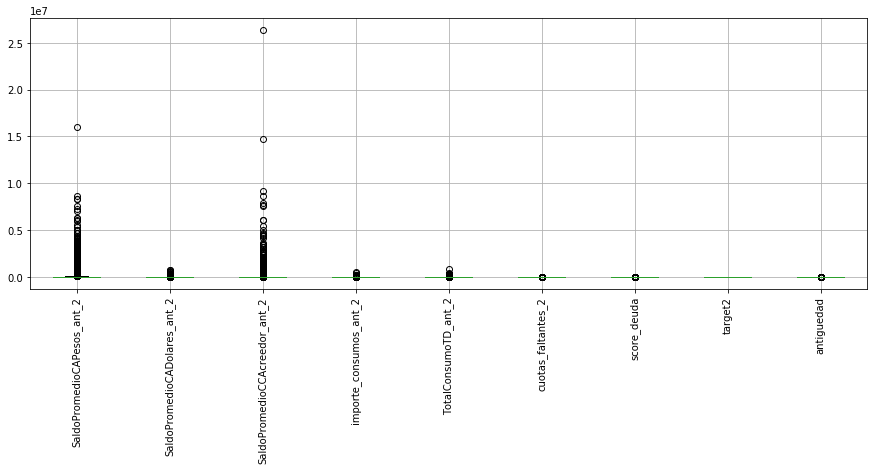

In [267]:
df.boxplot(columnas_numericas[27:36],rot = 90, figsize=(15,5))

#### Limpieza de Outliers

In [268]:
outlier_treatment(df)

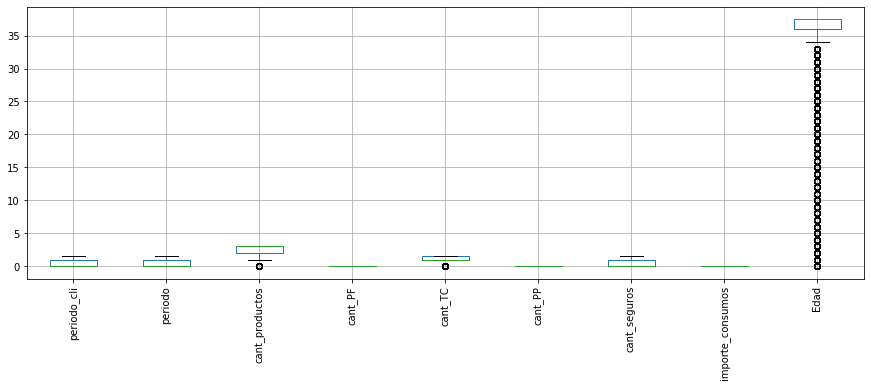

In [269]:
df.boxplot(columnas_numericas[0:9],rot = 90, figsize=(15,5))

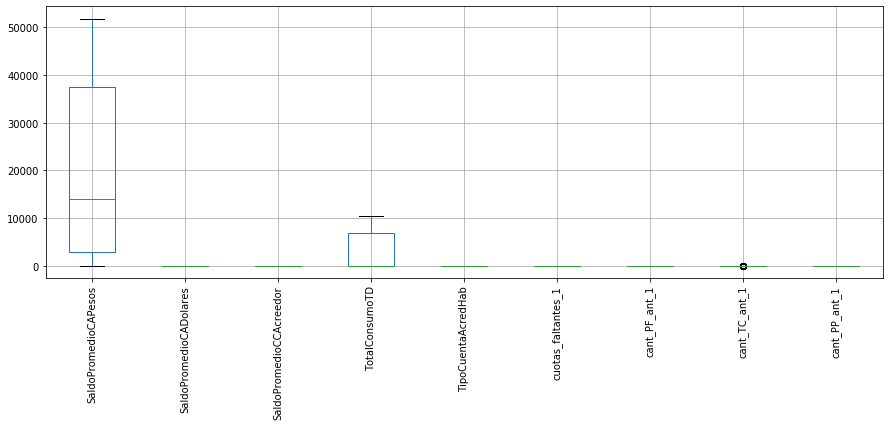

In [270]:
df.boxplot(columnas_numericas[9:18],rot = 90, figsize=(15,5))

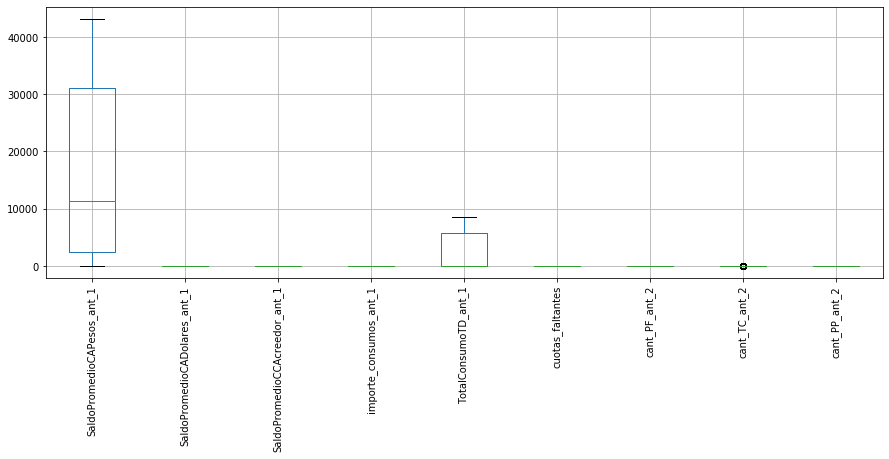

In [271]:
df.boxplot(columnas_numericas[18:27],rot = 90, figsize=(15,5))

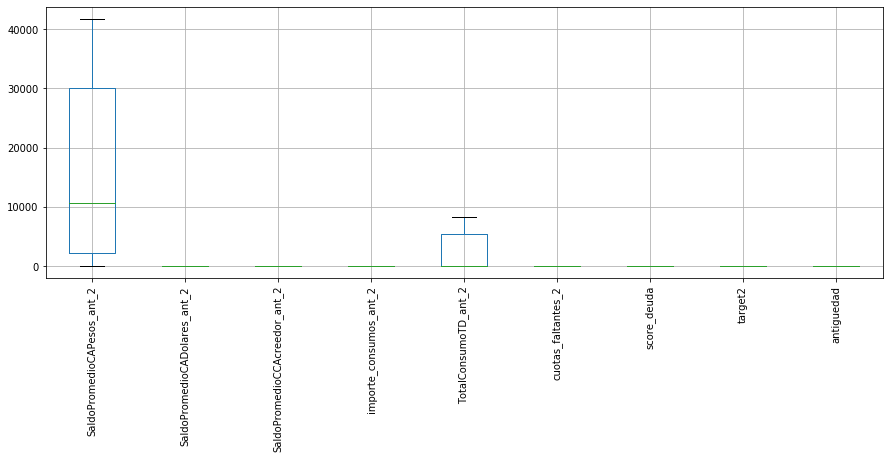

In [272]:
df.boxplot(columnas_numericas[27:36],rot = 90, figsize=(15,5))

### Limpieza de duplicados y eliminacion de columnas y filas innecesarias.

In [273]:
all(df.periodo == df.periodo_cli)

True

In [274]:
df.drop(columns='periodo',inplace=True)

In [275]:
df[df.Edad<=18]['target2'].value_counts()

0.0    911
1.0    695
Name: target2, dtype: int64

In [276]:
df=df[df.Edad>18].copy()

In [277]:
df.shape

(493281, 39)

In [278]:
[col for col in df.columns if df[col].nunique()==1]

['cant_PF',
 'cant_PP',
 'importe_consumos',
 'SaldoPromedioCCAcreedor',
 'TipoCuentaAcredHab',
 'cuotas_faltantes_1',
 'cant_PF_ant_1',
 'cant_PP_ant_1',
 'SaldoPromedioCADolares_ant_1',
 'SaldoPromedioCCAcreedor_ant_1',
 'importe_consumos_ant_1',
 'cuotas_faltantes',
 'cant_PF_ant_2',
 'cant_PP_ant_2',
 'SaldoPromedioCADolares_ant_2',
 'SaldoPromedioCCAcreedor_ant_2',
 'importe_consumos_ant_2',
 'cuotas_faltantes_2']

In [279]:
df.drop(columns=[col for col in df.columns if df[col].nunique()==1],inplace=True)

In [280]:
df.drop(columns=['FechaSaldos','periodo_cli'],inplace=True)

### Variables Continuas

#### Calcular media, std, min, max, suma. Esto es por fila entre los períodos, es decir, por ejemplo, cálculo de esos datos para los montos que incluyen _1 y _2. Dejarlas como columnas adicionales.

In [281]:
for col in df.columns:
    if col+'_ant_1' in df.columns:
        print("Calculating %s" % col)
        df[col+'_mean']=df[[col,col+'_ant_1',col+'_ant_2']].mean(axis=1)
        df[col+'_std']=df[[col,col+'_ant_1',col+'_ant_2']].std(axis=1)
        df[col+'_min']=df[[col,col+'_ant_1',col+'_ant_2']].min(axis=1)
        df[col+'_max']=df[[col,col+'_ant_1',col+'_ant_2']].max(axis=1)
        df[col+'_TasaNew']=df[col].div(df[col+'_ant_1'])
        df[col+'_TasaOld']=df[col].div(df[col+'_ant_2'])

Calculating cant_TC
Calculating SaldoPromedioCAPesos
Calculating TotalConsumoTD


In [282]:
df.shape

(493281, 37)

In [283]:
df.columns

Index(['cant_productos', 'cant_TC', 'FechaUltMovCA', 'cant_seguros', 'Edad',
       'Sexo', 'SaldoPromedioCAPesos', 'SaldoPromedioCADolares',
       'TotalConsumoTD', 'CategoriaProducto', 'cant_TC_ant_1',
       'SaldoPromedioCAPesos_ant_1', 'TotalConsumoTD_ant_1', 'cant_TC_ant_2',
       'SaldoPromedioCAPesos_ant_2', 'TotalConsumoTD_ant_2', 'score_deuda',
       'target2', 'antiguedad', 'cant_TC_mean', 'cant_TC_std', 'cant_TC_min',
       'cant_TC_max', 'cant_TC_TasaNew', 'cant_TC_TasaOld',
       'SaldoPromedioCAPesos_mean', 'SaldoPromedioCAPesos_std',
       'SaldoPromedioCAPesos_min', 'SaldoPromedioCAPesos_max',
       'SaldoPromedioCAPesos_TasaNew', 'SaldoPromedioCAPesos_TasaOld',
       'TotalConsumoTD_mean', 'TotalConsumoTD_std', 'TotalConsumoTD_min',
       'TotalConsumoTD_max', 'TotalConsumoTD_TasaNew',
       'TotalConsumoTD_TasaOld'],
      dtype='object')

### Variables Categóricas

In [284]:
df.select_dtypes(exclude='number')

,FechaUltMovCA,Sexo,CategoriaProducto
0,2019-12-02,M,12
1,2019-12-04,F,12
2,2019-12-05,F,12
3,2019-12-05,F,12
4,2019-12-05,F,14
...,...,...,...
494804,2020-02-06,Na,OTH
494845,2020-02-06,Na,OTH
494872,2020-02-06,Na,OTH
494873,2019-09-23,Na,OTH


In [285]:
df = pd.concat([df,pd.get_dummies(df.Sexo),pd.get_dummies(df.CategoriaProducto)],axis=1)

In [286]:
df.drop(columns=['Sexo','CategoriaProducto'],inplace=True)

In [287]:
df.head(10)

,cant_productos,cant_TC,FechaUltMovCA,cant_seguros,Edad,SaldoPromedioCAPesos,SaldoPromedioCADolares,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,target2,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH
0,2.0,0.0,2019-12-02,0.0,37.5,6784.500,0.00,2838.2400,0.0,4828.3800,5872.820,0.0,9440.56,4577.00,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,NaN,NaN,7017.813333,2314.924928,4828.38,9440.560,1.405130,0.718654,4429.353333,1522.668249,2838.24,5872.8200,0.483284,0.620109,0,1,0,0,1,0,0
1,1.0,0.0,2019-12-04,0.0,37.5,9231.100,0.00,6244.1500,0.0,7685.1800,6478.190,0.0,5029.59,8203.89,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,NaN,NaN,7315.290000,2125.037771,5029.59,9231.100,1.201156,1.835358,6975.410000,1070.311176,6244.15,8203.8900,0.963873,0.761121,1,0,0,0,1,0,0
2,1.0,0.0,2019-12-05,1.0,37.5,47496.610,0.00,10385.7075,0.0,43144.9725,8515.815,0.0,41733.93,8203.89,0.0,0.0,8.228719,0.0,0.0,0.0,0.0,NaN,NaN,44125.170833,3003.782911,41733.93,47496.610,1.100861,1.138081,9035.137500,1179.980421,8203.89,10385.7075,1.219579,1.265949,1,0,0,0,1,0,0
3,3.0,1.5,2019-12-05,1.0,37.5,24806.590,0.00,5335.6800,1.5,40815.3000,6714.540,1.5,26082.85,600.00,1.0,0.0,8.228719,1.5,0.0,1.5,1.5,1.0,1.0,30568.246667,8897.122367,24806.59,40815.300,0.607777,0.951069,4216.740000,3207.166958,600.00,6714.5400,0.794646,8.892800,1,0,0,0,1,0,0
4,3.0,1.5,2019-12-05,1.0,37.5,51832.995,0.03,183.1600,1.5,43144.9725,0.000,1.5,41733.93,1618.19,0.0,1.0,8.228719,1.5,0.0,1.5,1.5,1.0,1.0,45570.632500,5469.062835,41733.93,51832.995,1.201368,1.241987,600.450000,886.133696,0.00,1618.1900,inf,0.113188,1,0,0,0,0,1,0
5,3.0,0.0,2019-11-28,1.0,37.5,16614.820,0.00,0.0000,0.0,4578.1400,0.000,0.0,1906.14,0.00,1.0,1.0,3.000000,0.0,0.0,0.0,0.0,NaN,NaN,7699.700000,7835.459110,1906.14,16614.820,3.629164,8.716474,0.000000,0.000000,0.00,0.0000,NaN,NaN,0,1,0,0,1,0,0
6,3.0,1.5,2019-12-05,0.0,37.5,25430.410,0.00,2915.0100,1.5,20513.2600,4470.900,1.5,16250.88,3875.16,1.0,0.0,10.500000,1.5,0.0,1.5,1.5,1.0,1.0,20731.516667,4593.655378,16250.88,25430.410,1.239706,1.564864,3753.690000,785.025250,2915.01,4470.9000,0.651996,0.752230,0,1,0,1,0,0,0
7,2.0,0.0,2019-12-03,1.0,37.5,51832.995,0.00,0.0000,0.0,43144.9725,0.000,0.0,33692.46,0.00,0.0,0.0,8.228719,0.0,0.0,0.0,0.0,NaN,NaN,42890.142500,9072.951905,33692.46,51832.995,1.201368,1.538415,0.000000,0.000000,0.00,0.0000,NaN,NaN,0,1,0,0,0,1,0
8,2.0,0.0,2019-12-03,0.0,37.5,4006.110,0.00,8077.9300,0.0,3683.6400,8515.815,0.0,6238.73,8203.89,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,NaN,NaN,4642.826667,1391.465886,3683.64,6238.730,1.087541,0.642135,8265.878333,225.427890,8077.93,8515.8150,0.948580,0.984646,1,0,0,0,1,0,0
9,3.0,1.5,2019-12-05,1.0,37.5,14736.370,0.00,0.0000,1.5,5425.6800,115.000,1.5,9607.95,0.00,1.0,1.0,8.228719,1.5,0.0,1.5,1.5,1.0,1.0,9923.333333,4663.350411,5425.68,14736.370,2.716041,1.533768,38.333333,66.395281,0.00,115.0000,0.000000,NaN,1,0,0,0,0,1,0


In [288]:
df['DiasDesdeMov']=((df.FechaUltMovCA.dt.date - datetime(2020,2,10).date())*-1).dt.days

In [289]:
df['DiasDesdeMov'].fillna(-999,inplace=True)

#### Transformar variables Categóricas Ordinales con Label Encoding

In [290]:
df.drop(columns=['FechaUltMovCA'],inplace=True)

In [291]:
df.fillna(0,inplace=True)

In [292]:
df.shape

(493281, 42)

# 4- Modelado

## 4.1 Escala y Normalización

Este es un paso esencial en la fase de pre-procesamiento, ya que la mayoría de los algoritmos de Machine Learning tienen mucho mejor rendimiento cuando tratan con características que están en la misma escala. Así, se aseguran de que aunque algunas caractersístias poseen mayores magnitudes, no se usarán como predictor principal.

Sampleo para poder trabajar más rápido:

In [293]:
df = df.sample(frac=0.25)

In [294]:
y=df.target2

In [295]:
df.describe()

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,SaldoPromedioCADolares,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,target2,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
count,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.0,123320.0,123320.000000,123320.000000,123320.000000,123320.000000,1.233200e+05,1.233200e+05,123320.000000,123320.000000,123320.000000,123320.000000,1.233200e+05,1.233200e+05,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000
mean,2.568456,0.963307,0.340557,35.573747,20536.939588,0.007608,3159.788411,0.960830,16992.898532,2572.764611,0.955770,16312.079885,2475.412660,0.731779,0.356771,6.999849,0.959969,0.013597,0.947551,0.971160,inf,inf,17947.306002,4606.042798,13959.286689,22667.656517,inf,inf,2735.988561,1032.316828,1834.993981,3773.461169,inf,inf,0.562618,0.436353,0.001030,0.210607,0.178057,0.518140,0.093197,185.000162
std,0.673887,0.531071,0.510552,3.787817,19249.674192,0.013002,4212.486418,0.532269,16069.815463,3461.764066,0.534803,15562.762082,3337.179697,0.459729,0.479048,3.155809,0.528246,0.083337,0.537625,0.527845,NaN,NaN,16287.875838,4634.831721,14702.244848,19242.749055,NaN,NaN,3431.765688,1355.977589,2951.403321,4312.786671,NaN,NaN,0.496066,0.495934,0.032075,0.407741,0.382562,0.499673,0.290709,170.712326
min,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,1.000000,0.000000,36.000000,2929.355000,0.000000,0.000000,1.000000,2439.750000,0.000000,1.000000,2312.640000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.0,3063.156667,964.216880,1410.317500,4533.625000,8.025699e-01,7.818544e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
50%,3.000000,1.000000,0.000000,37.500000,14045.985000,0.000000,0.000000,1.000000,11358.450000,0.000000,1.000000,10645.810000,0.000000,1.000000,0.000000,8.228719,1.000000,0.000000,1.000000,1.000000,1.0,1.0,12871.651667,3631.678911,8110.170000,17566.780000,1.201368e+00,1.241987e+00,466.666667,425.951066,0.000000,1080.750000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,138.000000
75%,3.000000,1.500000,1.000000,37.500000,37427.472500,0.030000,6947.635000,1.500000,31330.212500,5668.247500,1.500000,30149.090000,5475.010000,1.000000,1.000000,10.500000,1.500000,0.000000,1.500000,1.500000,1.0,1.0,32103.701875,5881.821585,23149.747500,41963.682500,1.503232e+00,1.665442e+00,5747.249583,1493.244534,2870.062500,8515.815000,1.219579e+00,1.265949e+00,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,335.000000
max,3.000000,1.500000,1.500000,37.500000,51832.995000,0.030000,10385.707500,1.500000,43144.972500,8515.815000,1.500000,41733.930000,8203.890000,1.500000,1.000000,10.500000,1.500000,0.866025,1.500000,1.500000,inf,inf,45570.632500,29925.793616,41733.930000,51832.995000,inf,inf,9035.137500,5996.19102

In [296]:
df.columns = df.columns.astype(str)

In [297]:
colstoexclude=['target2']+[col for col in df.columns if 'Dolares' in col]

In [298]:
colstoexclude

['target2', 'SaldoPromedioCADolares']

In [299]:
X=df[[col for col in df.columns if col not in colstoexclude]]

In [300]:
X

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
454392,1.0,0.0,1.0,37.5,46291.280,342.00,0.0,36090.7100,234.00,0.0,39215.55,0.00,0.0,8.228719,0.0,0.0,0.0,0.0,0.0,0.0,40532.513333,5226.251180,36090.71,46291.280,1.282637,1.180432,192.000000,174.825627,0.00,342.00,1.461538,inf,1,0,0,0,1,0,0,363
290303,2.0,1.0,0.0,37.5,0.000,0.00,1.0,0.0000,0.00,1.0,0.00,0.00,1.0,2.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1,0,0,0,0,0,1,143
463105,3.0,1.0,0.0,37.5,10033.770,0.00,1.0,11372.7000,695.16,1.0,12256.43,0.00,1.0,2.000000,1.0,0.0,1.0,1.0,1.0,1.0,11220.966667,1119.071768,10033.77,12256.430,0.882268,0.818654,231.720000,401.350813,0.00,695.16,0.000000,0.000000,1,0,0,0,1,0,0,364
206872,2.0,0.0,1.0,37.5,51832.995,0.00,0.0,43144.9725,0.00,0.0,41733.93,0.00,0.0,10.500000,0.0,0.0,0.0,0.0,0.0,0.0,45570.632500,5469.062835,41733.93,51832.995,1.201368,1.241987,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0,1,0,0,0,1,0,68
351250,3.0,1.5,1.0,37.5,33788.930,0.00,1.5,23946.3000,0.00,1.5,41733.93,0.00,1.0,10.500000,1.5,0.0,1.5,1.5,1.0,1.0,33156.386667,8910.669366,23946.30,41733.930,1.411029,0.809627,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1,0,0,0,0,1,0,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270635,3.0,1.0,0.0,37.5,1290.190,0.00,1.0,848.8000,0.00,1.0,8247.93,0.00,1.0,10.500000,1.0,0.0,1.0,1.0,1.0,1.0,3462.306667,4150.343275,848.80,8247.930,1.520016,0.156426,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1,0,0,0,1,0,0,136
234942,3.0,1.5,0.0,37.5,32871.990,0.00,1.5,39003.1100,0.00,1.5,4915.97,0.00,1.5,8.228719,1.5,0.0,1.5,1.5,1.0,1.0,25597.023333,18170.776905,4915.97,39003.110,0.842804,6.686776,0.000000,0.000000,0.00,0.00,0.000000,0.000000,1,0,0,0,0,1,0,67
478650,3.0,1.0,0.0,32.0,34377.070,7329.02,1.0,4452.4900,365.00,1.0,17200.20,1447.02,1.0,3.000000,1.0,0.0,1.0,1.0,1.0,1.0,18676.586667,15016.820910,4452.49,34377.070,7.720864,1.998644,3047.013333,3747.582906,365.00,7329.02,20.079507,5.064906,1,0,0,0,0,1,0,199
479692,2.0,1.0,0.0,29.0,8975.250,5349.80,1.0,9421.4900,5080.88,1.0,5977.53,8149.18,0.0,2.000000,1.0,0.0,1.0,1.0,1.0,1.0,8124.756667,1872.890628,5977.53,9421.490,0.952636,1.501498,6193.286667,1699.181727,5080.88,8149.18,1.052928,0.656483,1,0,0,1,0,0,0,187


In [301]:
X = X.replace([np.inf, -np.inf], 0)

In [302]:
X.describe()

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
count,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,1.233200e+05,1.233200e+05,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000
mean,2.568456,0.963307,0.340557,35.573747,20536.939588,3159.788411,0.960830,16992.898532,2572.764611,0.955770,16312.079885,2475.412660,0.731779,6.999849,0.959969,0.013597,0.947551,0.971160,0.795268,0.790325,17947.306002,4606.042798,13959.286689,22667.656517,1.309273e+02,1.576970e+02,2735.988561,1032.316828,1834.993981,3773.461169,0.902741,1.024827,0.562618,0.436353,0.001030,0.210607,0.178057,0.518140,0.093197,185.000162
std,0.673887,0.531071,0.510552,3.787817,19249.674192,4212.486418,0.532269,16069.815463,3461.764066,0.534803,15562.762082,3337.179697,0.459729,3.155809,0.528246,0.083337,0.537625,0.527845,0.406637,0.412782,16287.875838,4634.831721,14702.244848,19242.749055,1.077895e+04,1.058245e+04,3431.765688,1355.977589,2951.403321,4312.786671,6.151526,18.992796,0.496066,0.495934,0.032075,0.407741,0.382562,0.499673,0.290709,170.712326
min,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,1.000000,0.000000,36.000000,2929.355000,0.000000,1.000000,2439.750000,0.000000,1.000000,2312.640000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3063.156667,964.216880,1410.317500,4533.625000,7.894782e-01,7.555066e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
50%,3.000000,1.000000,0.000000,37.500000,14045.985000,0.000000,1.000000,11358.450000,0.000000,1.000000,10645.810000,0.000000,1.000000,8.228719,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12871.651667,3631.678911,8110.170000,17566.780000,1.201368e+00,1.241987e+00,466.666667,425.951066,0.000000,1080.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,138.000000
75%,3.000000,1.500000,1.000000,37.500000,37427.472500,6947.635000,1.500000,31330.212500,5668.247500,1.500000,30149.090000,5475.010000,1.000000,10.500000,1.500000,0.000000,1.500000,1.500000,1.000000,1.000000,32103.701875,5881.821585,23149.747500,41963.682500,1.484966e+00,1.627802e+00,5747.249583,1493.244534,2870.062500,8515.815000,1.219579,1.265949,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,335.000000
max,3.000000,1.500000,1.500000,37.500000,51832.995000,10385.707500,1.500000,43144.972500,8515.815000,1.500000,41733.930000,8203.890000,1.500000,10.500000,1.500000,0.866025,1.500000,1.500000,1.500000,1.500000,45570.632500,29925.793616,41733.930000,51832.995000,2.591650e+06,2.201939e+06,9035.137500,5996.191021,8203.890000,10385.707500,1086.371077,4398.480000,1.000000,

Verificamos a través del describe que en algunas variables la desviación estandard es muy alta, lo que poderia prejudicar el desempeño del modelo. A seguir probamos algunas formas de escala y normalización para mejorar la distribución del dataset.

### Estandarización

La estandarización consiste en centrar las columnas de características con respecto a media 0 con desviación estándar 1 de forma que las columnas de características tengan los mismos parámetros que una distribución normal estándar (media cero y varianza unidad). De esta forma, es mucho más fácil para los algoritmos de aprendizaje “aprender” los pesos de los parámetros. Adicionalmente, mantiene información útil sobre valores atípicos y hace los algoritmos menos sensibles a ellos.

Probaremos dos formas para estandarizar los datos para ver como se comportan. Usaremos Standar Scaler y Robust Scaler.

### Standard Scaler

In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
scaler_std = StandardScaler()

In [305]:
X_scaled_std = scaler_std.fit_transform(X)

In [306]:
X_scaled_std = pd.DataFrame(X_scaled_std)
X_scaled_std.columns=X.columns

In [307]:
X_scaled_std

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
0,-2.327485,-1.813902,1.291633,0.508541,1.337916,-0.668916,-1.805165,1.188432,-0.675602,-1.787150,1.471690,-0.741771,-1.591769,0.389401,-1.817284,-0.163156,-1.762482,-1.839867,-1.955727,-1.914638,1.386633,0.133815,1.505315,1.227669,-0.012028,-0.014790,-0.741309,-0.632381,-0.621739,-0.795651,0.090839,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,2.148529,-1.036962,-0.320585,1.042693
1,-0.843551,0.069093,-0.667040,0.508541,-1.066876,-0.750104,0.073592,-1.057446,-0.743198,0.082705,-1.048152,-0.741771,0.583435,-1.584339,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-1.101886,-0.993793,-0.949470,-1.177989,-0.012147,-0.014902,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,-0.465435,-1.036962,3.119296,-0.246030
2,0.640383,0.069093,-0.667040,0.508541,-0.545631,-0.750104,0.073592,-0.349738,-0.542386,0.082705,-0.260601,-0.741771,0.583435,-1.584339,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-0.412968,-0.752343,-0.267002,-0.541049,-0.012065,-0.014824,-0.729735,-0.465324,-0.621739,-0.713764,-0.146751,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,2.148529,-1.036962,-0.320585,1.048551
3,-0.843551,-1.813902,1.291633,0.508541,1.625803,-0.750104,-1.805165,1.627410,-0.743198,-1.787150,1.633512,-0.741771,-1.591769,1.109118,-1.817284,-0.163156,-1.762482,-1.839867,-1.955727,-1.914638,1.695951,0.186204,1.889151,1.515660,-0.012035,-0.014784,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,-0.685367
4,0.640383,1.010590,1.291633,0.508541,0.688430,-0.750104,1.012970,0.432701,-0.743198,1.017632,1.633512,-0.741771,0.583435,1.109118,1.022315,-0.163156,1.027576,1.001888,0.503477,0.507959,0.933771,0.928760,0.679288,0.990833,-0.012016,-0.014825,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,1.025120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123315,0.640383,0.069093,-0.667040,0.508541,-0.999852,-0.750104,0.073592,-1.004627,-0.743198,0.082705,-0.518172,-0.741771,0.583435,1.109118,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-0.889315,-0.098321,-0.891737,-0.749362,-0.012006,-0.014887,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,2.148529,-1.036962,-0.320585,-0.287035
123316,0.640383,1.010590,-0.667040,0.508541,0.640795,-0.750104,1.012970,1.369667,-0.743198,1.017632,-0.732271,-0.741771,1.671037,0.389401,1.022315,-0.163156,1.027576,1.001888,0.503477,0.507959,0.469659,2.926706,-0.615100,0.848918,-0.012068,-0.014270,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,0.881706,-0.879863,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,-0.691225
123317,0.640383,0.069093,-0.667040,-0.943489,0.718983,0.989736,0.073592,-0.780374,-0.637760,0.082705,0.057067,-0.308163,0.583435,-1.267461,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,0.044775,2.246213,-0.646625,0.608513,-0.011430,-0.014713,0.090631,2.002450,-0.498068,0.824426,3.117413,0.212717,0.881706,-0.879863,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,0.082009
123318,-0.843551,0.069093,-0.667040,-1.735505,-0.600620,0.519888,0.073592,-0.471159,0.724522,0.082705,-0.664059,1.70

In [308]:
X_scaled_std.describe()

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
count,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05,1.233200e+05
mean,-1.044789e-15,5.716721e-15,1.507629e-15,-1.808845e-15,-2.450773e-16,-4.534829e-15,-3.332059e-15,1.745711e-16,2.184876e-15,6.309925e-15,-2.412187e-16,-1.405542e-15,-5.345664e-15,-3.044310e-15,-8.865579e-17,-2.431602e-15,4.345002e-15,-1.249818e-15,-3.478855e-16,6.595708e-16,2.864793e-16,5.030261e-16,-3.260159e-16,-1.760350e-16,-1.032628e-15,8.869772e-16,2.981001e-15,-4.047002e-16,-4.358897e-15,2.169535e-15,1.910170e-15,1.572533e-15,-6.365273e-16,-6.821174e-16,3.494233e-15,-6.469366e-15,2.104352e-15,1.327404e-15,5.025475e-15,9.321093e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.811420e+00,-1.813902e+00,-6.670401e-01,-4.375559e+00,-1.066876e+00,-7.501036e-01,-1.805165e+00,-1.057446e+00,-7.431977e-01,-1.787150e+00,-1.048152e+00,-7.417709e-01,-1.591769e+00,-2.218093e+00,-1.817284e+00,-1.631562e-01,-1.762482e+00,-1.839867e+00,-1.955727e+00,-1.914638e+00,-1.101886e+00,-9.937926e-01,-9.494702e-01,-1.177989e+00,-1.214662e-02,-1.490181e-02,-7.972571e-01,-7.613113e-01,-6.217386e-01,-8.749509e-01,-1.467514e-01,-5.395895e-02,-1.134164e+00,-8.798629e-01,-3.210767e-02,-5.165224e-01,-4.654347e-01,-1.036962e+00,-3.205851e-01,-1.060268e+00
25%,-8.435513e-01,6.909301e-02,-6.670401e-01,1.125331e-01,-9.146989e-01,-7.501036e-01,7.359176e-02,-9.056238e-01,-7.431977e-01,8.270454e-02,-8.995509e-01,-7.417709e-01,-1.591769e+00,-9.505840e-01,7.578199e-02,-1.631562e-01,9.755700e-02,5.463672e-02,5.034766e-01,5.079588e-01,-9.138214e-01,-7.857547e-01,-8.535445e-01,-9.423864e-01,-1.207338e-02,-1.483042e-02,-7.972571e-01,-7.613113e-01,-6.217386e-01,-8.749509e-01,-1.467514e-01,-5.395895e-02,-1.134164e+00,-8.798629e-01,-3.210767e-02,-5.165224e-01,-4.654347e-01,-1.036962e+00,-3.205851e-01,-6.853672e-01
50%,6.403828e-01,6.909301e-02,-6.670401e-01,5.085412e-01,-3.371995e-01,-7.501036e-01,7.359176e-02,-3.506245e-01,-7.431977e-01,8.270454e-02,-3.640930e-01,-7.417709e-01,5.834350e-01,3.894009e-01,7.578199e-02,-1.631562e-01,9.755700e-02,5.463672e-02,5.034766e-01,5.079588e-01,-3.116229e-01,-2.102272e-01,-3.978400e-01,-2.650815e-01,-1.203517e-02,-1.478445e-02,-6.612722e-01,-4.471816e-01,-6.217386e-01,-6.243578e-01,-1.467514e-01,-5.395895e-02,8.817064e-01,-8.798629e-01,-3.210767e-02,-5.165224e-01,-4.654347e-01,9.643553e-01,-3.205851e-01,-2.753190e-01
75%,6.403828e-01,1.010590e+00,1.291633e+00,5.085412e-01,8.774487e-01,8.991986e-01,1.012970e+00,8.921927e-01,8.9419

Despues de aplicar el StandardScaler todas las variables poseen desviación estandard igual a 1.

### Robust Scaler

El RobustScaler remueve la mediana y escala los datos de acuerdo con el rango cuantil, y es mas utlizado en dataset con muchos outliers.

In [309]:
from sklearn.preprocessing import RobustScaler

In [310]:
scaler_rob = RobustScaler()

In [311]:
X_scaled_rob = scaler_rob.fit_transform(X)

In [312]:
X_scaled_rob=pd.DataFrame(X_scaled_rob)
X_scaled_rob.columns = X.columns

In [313]:
X_scaled_rob

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
0,-2.0,-2.0,1.0,0.000000,0.934697,0.049225,-2.0,0.856070,0.041283,-2.0,1.026343,0.000000,-1.0,0.000000,-2.0,0.0,-2.0,-2.0,-1.0,-1.0,0.952491,0.324258,1.287087,0.767418,0.116852,-0.070567,-0.047791,-0.168174,0.000000,-0.086750,1.198396,0.000000,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.842697
1,-1.0,0.0,0.0,0.000000,-0.407152,0.000000,0.0,-0.393156,0.000000,0.0,-0.382441,0.000000,0.0,-0.958265,0.0,0.0,0.0,0.0,0.0,0.0,-0.443230,-0.738506,-0.373063,-0.469323,-1.727374,-1.423815,-0.081198,-0.285252,0.000000,-0.126911,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.018727
2,0.0,0.0,0.0,0.000000,-0.116302,0.000000,0.0,0.000493,0.122641,0.0,0.057860,0.000000,0.0,-0.958265,0.0,0.0,0.0,0.0,0.0,0.0,-0.056841,-0.510941,0.088484,-0.141874,-0.458815,-0.485310,-0.040880,-0.016474,0.000000,-0.045279,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.846442
3,-1.0,-2.0,1.0,0.000000,1.095335,0.000000,-2.0,1.100243,0.000000,-2.0,1.116813,0.000000,-1.0,0.349428,-2.0,0.0,-2.0,-2.0,-1.0,-1.0,1.125977,0.373634,1.546672,0.915473,0.000000,0.000000,-0.081198,-0.285252,0.000000,-0.126911,0.000000,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.262172
4,0.0,1.0,1.0,0.000000,0.572291,0.000000,1.0,0.435710,0.000000,1.0,1.116813,0.000000,0.0,0.349428,1.0,0.0,1.0,1.0,0.0,0.0,0.698497,1.073488,0.728452,0.645662,0.301459,-0.495657,-0.081198,-0.285252,0.000000,-0.126911,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123315,0.0,0.0,0.0,0.000000,-0.369753,0.000000,0.0,-0.363776,0.000000,0.0,-0.086142,0.000000,0.0,0.349428,0.0,0.0,0.0,0.0,0.0,0.0,-0.324007,0.105471,-0.334018,-0.248967,0.458165,-1.244488,-0.081198,-0.285252,0.000000,-0.126911,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-0.007491
123316,0.0,1.0,0.0,0.000000,0.545711,0.000000,1.0,0.956878,0.000000,1.0,-0.205839,0.000000,0.5,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.438193,2.956541,-0.146931,0.572704,-0.515557,6.241911,-0.081198,-0.285252,0.000000,-0.126911,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.265918
123317,0.0,0.0,0.0,-3.666667,0.589339,1.054894,0.0,-0.239039,0.064394,0.0,0.235461,0.264295,0.0,-0.804418,0.0,0.0,0.0,0.0,0.0,0.0,0.199891,2.315180,-0.168251,0.449112,9.373988,0.867432,0.448971,2.224439,0.127175,0.733725,16.464296,4.000876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228464
123318,-1.0,0.0,0.0,-5.666667,-0.146986,0.770017,0.0,-0.067045,0.896376,0.0,-0.167704,1.488432,-1.0,-0.958265,0.0,0.0,0.0,0.0,0.0,0.0,-0.163458,-0.357651,-0.098100,-0.217614,-0.357637,0.297504,0.996411,0.852661,1.770303,0.830036,0.863354,0.518570,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.183521


In [314]:
X_scaled_rob.describe()

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
count,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,1.233200e+05,123320.000000,123320.000000,1.233200e+05,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,1.233200e+05,1.233200e+05,1.233200e+05,123320.000000,1.233200e+05,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000,123320.000000
mean,-0.431544,-0.073386,0.340557,-1.284169,0.188154,0.454801,-0.078341,1.950280e-01,0.453891,-0.088461,2.035558e-01,0.452129,-0.268221,-0.189057,-0.080063,0.013597,-0.104898,-0.057679,-0.204732,-0.209675,0.174778,0.198138,0.269056,1.362775e-01,1.865251e+02,1.793602e+02,0.394854,4.060726e-01,0.639357,0.316201,0.740207,0.809533,-0.437382,0.436353,0.001030,0.210607,0.178057,-0.481860,0.093197,0.176031
std,0.673887,1.062142,0.510552,2.525211,0.557992,0.606319,1.064538,5.562325e-01,0.610729,1.069606,5.590785e-01,0.609529,0.459729,0.485509,1.056492,0.083337,1.075251,1.055690,0.406637,0.412782,0.560867,0.942498,0.676294,5.140988e-01,1.549840e+04,1.213173e+04,0.597114,9.080747e-01,1.028341,0.506444,5.043976,15.002811,0.496066,0.495934,0.032075,0.407741,0.382562,0.499673,0.290709,0.639372
min,-3.000000,-2.000000,0.000000,-12.333333,-0.407152,0.000000,-2.000000,-3.931557e-01,0.000000,-2.000000,-3.824414e-01,0.000000,-1.000000,-1.265957,-2.000000,0.000000,-2.000000,-2.000000,-1.000000,-1.000000,-0.443230,-0.738506,-0.373063,-4.693228e-01,-1.727374e+00,-1.423815e+00,-0.081198,-2.852521e-01,0.000000,-0.126911,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.501873
25%,-1.000000,0.000000,0.000000,-1.000000,-0.322239,0.000000,0.000000,-3.087074e-01,0.000000,0.000000,-2.993618e-01,0.000000,-1.000000,-0.650572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.337752,-0.542431,-0.308189,-3.482002e-01,-5.922316e-01,-5.577015e-01,-0.081198,-2.852521e-01,0.000000,-0.126911,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.262172
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.148061e-17,0.000000,0.000000,-3.267281e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.859597e-17,0.000000e+00,0.000000e+00,0.000000,1.903325e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.677761,1.000000,1.000000,6.912926e-01,1.000000,1.000000,7.006382e-01,1.000000,0.000000,0.349428,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.662248,0.457569,0.691811,6.517998e-01,4.077684e-01,4.422985e-01,0.918802,7.147479e-01,1.000000,0.873089,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.737828
max,0.000000,1.000000,1.500000,0.000000,1.095335,1.494855,1.000000,1.100243e+00,1.502372,1.000000,1.116813e+00,1.498425,0.500000,0.349428,1.000000,0.866025,1.000000,1.000000,0.500000,0.500000,1.125977,5.346935,1.546672,9.154732e-01,3.726374e+06,2.524304e+06,1.490882,3.730293e+00,2.858436,1.092668,890.775628,3474.452375,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,21.112360


Despues de aplicar el RobustScaler la desviación estandard de algunas variables siguen muy alta, así como la media de algunas variables.

#### Divison en Train y Test

Para el modelo, iremos utilizar la funcion **StandardScaler** para normalizar la distribucion del dataset.

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
X = X_scaled_std.copy()

In [317]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [318]:
X_train

,cant_productos,cant_TC,cant_seguros,Edad,SaldoPromedioCAPesos,TotalConsumoTD,cant_TC_ant_1,SaldoPromedioCAPesos_ant_1,TotalConsumoTD_ant_1,cant_TC_ant_2,SaldoPromedioCAPesos_ant_2,TotalConsumoTD_ant_2,score_deuda,antiguedad,cant_TC_mean,cant_TC_std,cant_TC_min,cant_TC_max,cant_TC_TasaNew,cant_TC_TasaOld,SaldoPromedioCAPesos_mean,SaldoPromedioCAPesos_std,SaldoPromedioCAPesos_min,SaldoPromedioCAPesos_max,SaldoPromedioCAPesos_TasaNew,SaldoPromedioCAPesos_TasaOld,TotalConsumoTD_mean,TotalConsumoTD_std,TotalConsumoTD_min,TotalConsumoTD_max,TotalConsumoTD_TasaNew,TotalConsumoTD_TasaOld,F,M,Na,10,12,14,OTH,DiasDesdeMov
44461,-2.327485,-1.813902,-0.667040,0.508541,-0.998718,-0.750104,-1.805165,-0.969520,-0.743198,-1.787150,-1.014737,-0.741771,-1.591769,-0.950584,-1.817284,-0.163156,-1.762482,-1.839867,-1.955727,-1.914638,-1.035476,-0.888287,-0.914099,-1.104561,-0.012060,-0.014663,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,1.936024,-0.465435,-1.036962,-0.320585,-0.685367
98964,0.640383,0.069093,-0.667040,0.508541,-1.066876,-0.750104,0.073592,-1.057446,-0.743198,0.082705,-1.048152,-0.741771,-1.591769,0.389401,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-1.101886,-0.993793,-0.949470,-1.177989,-0.012147,-0.014902,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,1.936024,-0.465435,-1.036962,-0.320585,4.985014
6060,0.640383,1.010590,1.291633,0.508541,0.411170,-0.210223,1.012970,0.570556,1.716776,1.017632,0.920856,1.716569,0.583435,0.389401,1.022315,-0.163156,1.027576,1.001888,0.503477,0.507959,0.642905,-0.510294,0.829965,0.414466,-0.012046,-0.014814,1.047664,1.832397,0.148823,1.099608,-0.103338,-0.039363,-1.134164,1.136541,-0.032108,-0.516522,2.148529,-1.036962,-0.320585,-0.691225
77039,0.640383,0.069093,-0.667040,0.508541,1.625803,-0.750104,0.073592,1.627410,-0.743198,0.082705,1.633512,-0.741771,0.583435,0.389401,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,1.695951,0.186204,1.889151,1.515660,-0.012035,-0.014784,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,-0.691225
64498,-0.843551,0.069093,1.291633,0.508541,-1.006308,-0.707373,0.073592,-1.006736,-0.558898,0.082705,-1.047510,-0.741771,0.583435,-0.633707,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-1.061143,-0.865930,-0.948790,-1.117399,-0.012014,-0.003884,-0.717803,-0.518725,-0.621739,-0.727018,-0.100887,-0.053959,-1.134164,1.136541,-0.032108,1.936024,-0.465435,-1.036962,-0.320585,-0.650220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118632,-0.843551,0.069093,-0.667040,-0.415478,-0.762523,-0.750104,0.073592,-1.057207,-0.743198,0.082705,-1.047906,-0.741771,0.583435,0.000048,0.075782,-0.163156,0.097557,0.054637,0.503477,0.507959,-0.981830,-0.264466,-0.949209,-0.873526,0.129398,0.129271,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,1.936024,-0.465435,-1.036962,-0.320585,1.212570
106123,0.640383,1.010590,-0.667040,0.508541,1.625803,-0.750104,1.012970,1.627410,-0.743198,1.017632,1.633512,-0.741771,0.583435,0.389401,1.022315,-0.163156,1.027576,1.001888,0.503477,0.507959,1.695951,0.186204,1.889151,1.515660,-0.012035,-0.014784,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,-0.691225
4852,0.640383,1.010590,-0.667040,-0.415478,-0.142815,-0.750104,1.012970,-0.331635,-0.743198,1.017632,-0.420758,-0.741771,0.583435,1.109118,1.022315,-0.163156,1.027576,1.001888,0.503477,0.507959,-0.299335,-0.089077,-0.285355,-0.253595,-0.012005,-0.014730,-0.797257,-0.761311,-0.621739,-0.874951,-0.146751,-0.053959,-1.134164,1.136541,-0.032108,-0.516522,-0.465435,0.964355,-0.320585,-0.685367
88486,0.640383,0.069093,-0.667040,-1.207494,0.704915,1.715364,0.073592,0.973152,-0.569875,0.08

In [319]:
y_train.shape

(92490,)

In [320]:
X_test.shape

(30830, 40)

In [321]:
y_test.shape

(30830,)

## 4.2 Desbalance de clase

Las proporcion de las clases en nuestro target estan desbalanceadas, con solo 35% del tagert igual a 1, lo que poderia causar problemas en las predicciones. Así, a seguir, probaremos las tecnias de upsampling y downsampling para mejorar la proporcion de las muestras en 50-50.

In [322]:
y_train.value_counts()

0.0    59548
1.0    32942
Name: target2, dtype: int64

In [323]:
y_train.value_counts(normalize=True)

0.0    0.643832
1.0    0.356168
Name: target2, dtype: float64

### Upsampling

In [324]:
from sklearn.utils import resample

Upsampling es el proceso de duplicar aleatoriamente observaciones de la clase minoritaria para reforzar su señal.

In [325]:
#Exibe la distribución de clases antes
print("Antes: \n", y_train.value_counts())

#Combinar los dos datasets para realizar el resampling
train_data=pd.concat([X_train.reset_index(),y_train.reset_index()],axis=1)
train_data.drop(columns='index',inplace=True)

#Separamnos clases mayoritarias y minoritarias
df_majority = train_data[train_data['target2']==0]
df_minority = train_data[train_data['target2']==1] 

#Aumentar (upsample) la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,               # muestra com replacement
                                 n_samples=len(df_majority), # Tener el mismo numero de clases que la clase mayoritaria
                                 random_state=27) # Tener resultados reproducibiles

#Combinar la clase mayoritaria con la clase minoritaria aumentada (upsampled)
upsampled = pd.concat([df_majority, df_minority_upsampled])

# Conta los nuevos valores
print("\n Después: \n", upsampled.target2.value_counts())

Antes: 
 0.0    59548
1.0    32942
Name: target2, dtype: int64

 Después: 
 1.0    59548
0.0    59548
Name: target2, dtype: int64


Verificamos que el ahora las clases tienen la misma proporcion (1:1)

In [326]:
from sklearn.utils import shuffle
upsampled = shuffle(upsampled)

### Downsampling

Downsampling es el proceso de eliminación aleatoria de observaciones de la clase mayoritaria para evitar que su señal domine el algoritmo de aprendizaje.

In [327]:
#Exibe la distribución de clases antes
print("Antes: \n" , y_train.value_counts())

#Combinar los dos datasets para realizar el resampling
train_data=pd.concat([X_train.reset_index(),y_train.reset_index()],axis=1)
train_data.drop(columns='index',inplace=True)

#Separamnos clases mayoritarias y minoritarias
df_majority = train_data[train_data['target2']==0]
df_minority = train_data[train_data['target2']==1] 

#Aumentar (upsample) la clase minoritaria
df_majority_downsampled = resample(df_majority,
                                 replace=False,               # muestra sin replacement
                                 n_samples=len(df_minority), # Tener el mismo numero de la clase minoritaria
                                 random_state=27) # Tener resultados reproducibiles

#Combinar la clase mayoritaria con la clase minoritaria aumentada (upsampled)
downsampled = pd.concat([df_minority, df_majority_downsampled])

# Conta los nuevos valores
print("\n Después: \n", downsampled['target2'].value_counts())

Antes: 
 0.0    59548
1.0    32942
Name: target2, dtype: int64

 Después: 
 0.0    32942
1.0    32942
Name: target2, dtype: int64


Text(0.5, 1.0, 'Clases balanceadas - downsampled')

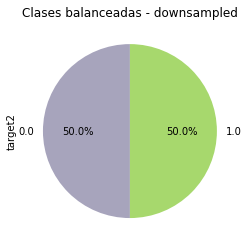

In [328]:
colors = ['#a7a4bc', '#a7d86d']
ax = downsampled['target2'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)
ax.set_title('Clases balanceadas - downsampled')

In [329]:
downsampled = shuffle(downsampled)

### Prueba con los modelos

Ahora iremos evaluar los rendimentos de algunos modelos para las diferentes técnicas.

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [331]:
def print_model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    #print(classification_report(y_test,y_preds))
    print('Acuracy: %.2f' % accuracy_score(y_test,y_preds))
    print('Precision: %.2f' % precision_score(y_test,y_preds))
    print('Recall: %.2f' % recall_score(y_test,y_preds))
    print('F-score: %.2f' % f1_score(y_test,y_preds))

#### Upsampling

In [332]:
#Separando variables (X) y target (y)
y_train_up = upsampled['target2']
X_train_up = upsampled.drop(columns='target2')

In [333]:
print_model_score(LogisticRegression(penalty='l2',solver='lbfgs',C=0.1,max_iter=10000), X_train_up, X_test, y_train_up, y_test)

Acuracy: 0.57
Precision: 0.43
Recall: 0.58
F-score: 0.49


In [334]:
print_model_score(DecisionTreeClassifier(criterion='entropy',max_depth=6), X_train_up, X_test, y_train_up, y_test)

Acuracy: 0.59
Precision: 0.45
Recall: 0.59
F-score: 0.51


In [335]:
print_model_score(RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42), X_train_up, X_test, y_train_up, y_test)

Acuracy: 0.58
Precision: 0.44
Recall: 0.60
F-score: 0.50


In [336]:
xgb_model = xgb.XGBClassifier()
print_model_score(xgb_model,X_train_up, X_test, y_train_up, y_test)

Acuracy: 0.59
Precision: 0.45
Recall: 0.55
F-score: 0.49


#### Downsampling

In [337]:
#Separando variables (X) y target (y)
y_train_down = downsampled['target2']
X_train_down = downsampled.drop(columns='target2')

In [338]:
print_model_score(LogisticRegression(penalty='l2',solver='lbfgs',C=0.1,max_iter=10000), X_train_down, X_test, y_train_down, y_test)

Acuracy: 0.57
Precision: 0.43
Recall: 0.58
F-score: 0.49


In [339]:
print_model_score(DecisionTreeClassifier(criterion='entropy',max_depth=6), X_train_down, X_test, y_train_down, y_test)

Acuracy: 0.59
Precision: 0.45
Recall: 0.58
F-score: 0.51


In [340]:
print_model_score(RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42), X_train_down, X_test, y_train_down, y_test)

Acuracy: 0.58
Precision: 0.44
Recall: 0.59
F-score: 0.50


In [341]:
xgb_model = xgb.XGBClassifier()
print_model_score(xgb_model,X_train_down, X_test, y_train_down, y_test)

Acuracy: 0.58
Precision: 0.44
Recall: 0.61
F-score: 0.51


Para las predicciones usamos la tecnica de downsampling.

## 4.3 - Kfold Cross Validation

Para la validación cruzada, iremos utilizar el StratifiedKFold, que ira dividir las categorias del dataset de manera uniforme para cada fold.

In [342]:
from sklearn.model_selection import StratifiedKFold

#crea el modelo y especifica el numero de divisiones (folds)
skf = StratifiedKFold(n_splits=5,shuffle=False)

In [343]:
#Divide los folds
for train_index, test_index in skf.split(X_train_down,y_train_down):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

TRAIN: [13077 13078 13080 ... 65881 65882 65883] TEST: [    0     1     2 ... 13275 13277 13279]
TRAIN: [    0     1     2 ... 65881 65882 65883] TEST: [13077 13078 13080 ... 26711 26714 26715]
TRAIN: [    0     1     2 ... 65881 65882 65883] TEST: [25987 25989 25992 ... 39695 39700 39702]
TRAIN: [    0     1     2 ... 65881 65882 65883] TEST: [39349 39350 39352 ... 52909 52912 52913]
TRAIN: [    0     1     2 ... 52909 52912 52913] TEST: [52504 52505 52507 ... 65881 65882 65883]


### Probando con los modelos

Ahora vamos evaluar utilizar los folds para evaluar el resultado de alguns modelos.

In [344]:
def calculate_roc(testy,lr_probs):
    # calculate scores
    ns_probs = [0 for _ in range(len(testy))]
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [345]:
def kfold_prueba (model,X_train, y_train):
    cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])
    fprs, tprs, scores = [], [], []
    
    for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
        model.fit(X_train.iloc[train], y_train.iloc[train])
        y_train_preds = model.predict_proba(X_train)
        y_preds = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_train, y_train_preds[:,1])
        auc_score_train = roc_auc_score(y_train, y_train_preds[:,1])
        fpr, tpr, _ = roc_curve(y_test, y_preds[:,1])
        auc_score = roc_auc_score(y_test, y_preds[:,1])
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        calculate_roc(y_test, y_preds[:,1])
        
    k_df = pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
   
    scoring = ['precision_macro', 'recall_macro','f1_macro']
    scores = cross_validate(model, X_train, y_train, scoring=scoring)
    
    print(k_df)
    print ('-----')
    print("Scores:")
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("F1: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))

#### Regresion Logistica

No Skill: ROC AUC=0.500
Model: ROC AUC=0.599


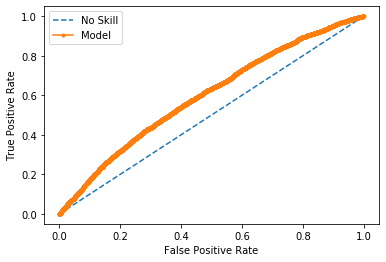

No Skill: ROC AUC=0.500
Model: ROC AUC=0.599


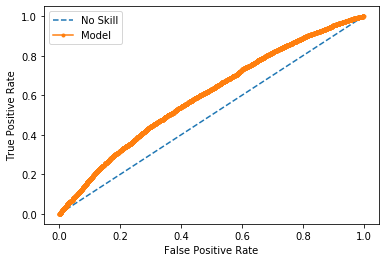

No Skill: ROC AUC=0.500
Model: ROC AUC=0.599


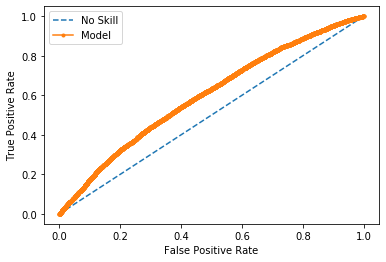

No Skill: ROC AUC=0.500
Model: ROC AUC=0.599


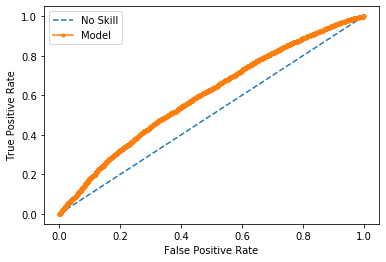

No Skill: ROC AUC=0.500
Model: ROC AUC=0.600


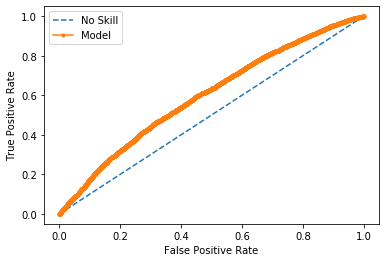

   AUC Train  AUC Test
0   0.602382  0.599299
1   0.602326  0.599063
2   0.602428  0.599185
3   0.602192  0.599443
4   0.602075  0.599512
-----
Scores:
Recall: 0.57 (+/- 0.01)
Precision: 0.57 (+/- 0.01)
F1: 0.57 (+/- 0.01)


In [346]:
logreg = LogisticRegression(penalty='l2',solver='lbfgs',C=0.1,max_iter=10000)
kfold_prueba(logreg, X_train_down, y_train_down)

#### XGBoost

No Skill: ROC AUC=0.500
Model: ROC AUC=0.696


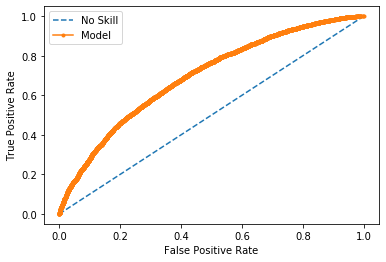

No Skill: ROC AUC=0.500
Model: ROC AUC=0.694


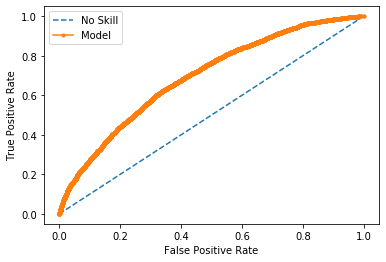

No Skill: ROC AUC=0.500
Model: ROC AUC=0.694


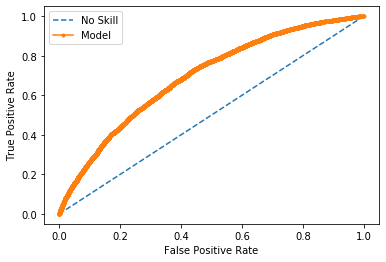

No Skill: ROC AUC=0.500
Model: ROC AUC=0.692


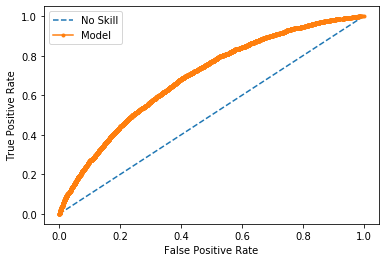

No Skill: ROC AUC=0.500
Model: ROC AUC=0.695


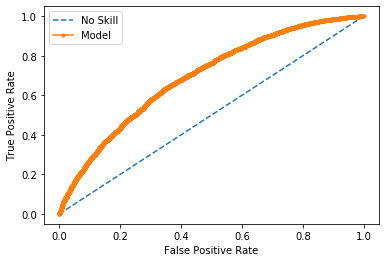

   AUC Train  AUC Test
0   0.761491  0.696102
1   0.762637  0.694205
2   0.765408  0.694099
3   0.757722  0.692235
4   0.760609  0.694776
-----
Scores:
Recall: 0.59 (+/- 0.01)
Precision: 0.59 (+/- 0.01)
F1: 0.59 (+/- 0.01)


In [347]:
xgb_model = xgb.XGBClassifier()
kfold_prueba(xgb_model,X_train_down, y_train_down)

#### Decision Tree

No Skill: ROC AUC=0.500
Model: ROC AUC=0.622


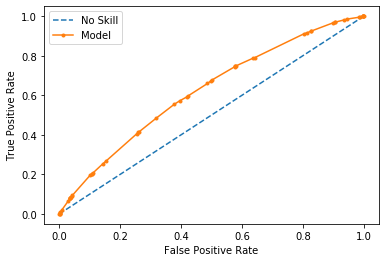

No Skill: ROC AUC=0.500
Model: ROC AUC=0.621


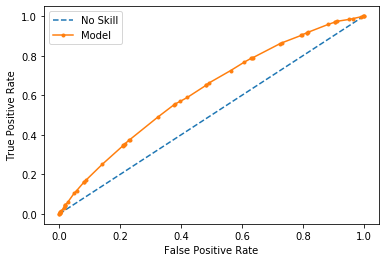

No Skill: ROC AUC=0.500
Model: ROC AUC=0.618


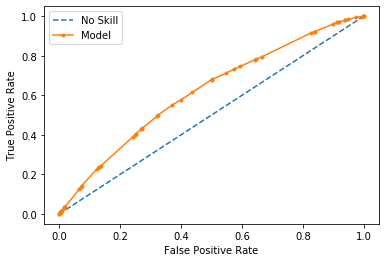

No Skill: ROC AUC=0.500
Model: ROC AUC=0.616


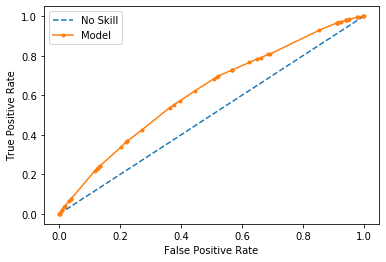

No Skill: ROC AUC=0.500
Model: ROC AUC=0.620


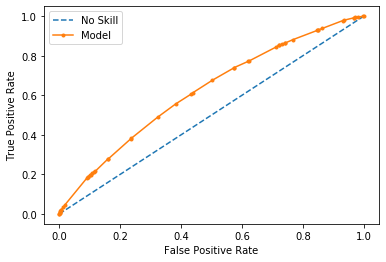

   AUC Train  AUC Test
0   0.631432  0.621966
1   0.631661  0.621477
2   0.629115  0.618172
3   0.629227  0.616493
4   0.629175  0.620371
-----
Scores:
Recall: 0.59 (+/- 0.01)
Precision: 0.59 (+/- 0.01)
F1: 0.59 (+/- 0.01)


In [348]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
kfold_prueba(tree, X_train_down, y_train_down)

#### Random Forest

No Skill: ROC AUC=0.500
Model: ROC AUC=0.607


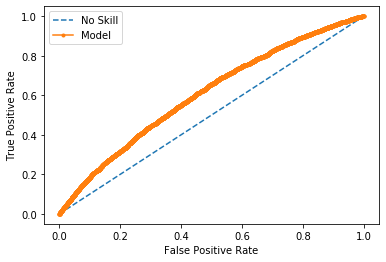

No Skill: ROC AUC=0.500
Model: ROC AUC=0.609


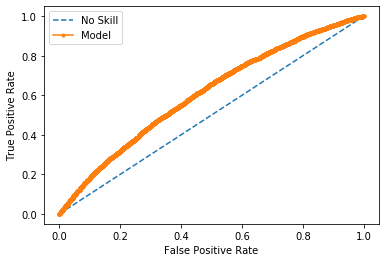

No Skill: ROC AUC=0.500
Model: ROC AUC=0.607


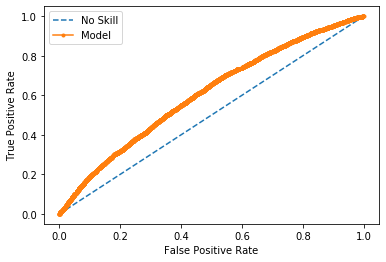

No Skill: ROC AUC=0.500
Model: ROC AUC=0.608


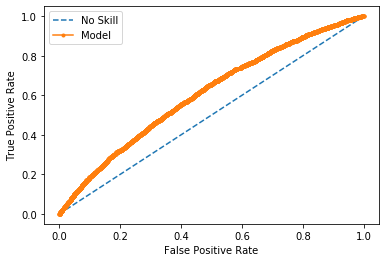

No Skill: ROC AUC=0.500
Model: ROC AUC=0.608


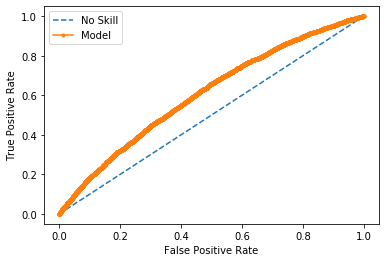

   AUC Train  AUC Test
0   0.618669  0.607412
1   0.620300  0.608632
2   0.618371  0.606640
3   0.620256  0.607948
4   0.619001  0.608398
-----
Scores:
Recall: 0.58 (+/- 0.01)
Precision: 0.58 (+/- 0.01)
F1: 0.58 (+/- 0.01)


In [349]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
kfold_prueba(rfc, X_train_down, y_train_down)

## Entrenar y evaluar Modelos

### Regresión Logística

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
logreg = LogisticRegression(penalty='l2',solver='lbfgs',C=0.1,max_iter=10000)

In [352]:
logreg.fit(X_train_down,y_train_down)

LogisticRegression(C=0.1, max_iter=10000)

In [353]:
y_preds = logreg.predict_proba(X_test)

In [354]:
param_grid = { 
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1,1,10]
}

In [355]:
CV_rfc = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 2,n_jobs=6, verbose=5)

In [356]:
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   4 out of  12 | elapsed:    3.5s remaining:    7.2s
[Parallel(n_jobs=6)]: Done   7 out of  12 | elapsed:    4.5s remaining:    3.2s
[Parallel(n_jobs=6)]: Done  10 out of  12 | elapsed:    5.2s remaining:    1.0s
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed:    5.7s finished


GridSearchCV(cv=2, estimator=LogisticRegression(C=0.1, max_iter=10000),
             n_jobs=6,
             param_grid={'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
             verbose=5)

In [357]:
CV_rfc.best_estimator_.score(X_test,y_test)

0.6380540376442015

In [358]:
CV_rfc.best_score_

0.6469036958336496

In [359]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.72215152, 1.59788346, 1.12923265, 1.84559798, 1.40348268,
        1.6037426 ]),
 'std_fit_time': array([0.00049806, 0.17112494, 0.18483663, 0.01915646, 0.14822578,
        0.0461297 ]),
 'mean_score_time': array([0.01501524, 0.03001499, 0.01098824, 0.00997269, 0.00996864,
        0.00699949]),
 'std_score_time': array([3.98457050e-03, 9.98568535e-03, 1.69277191e-05, 2.26497650e-06,
        2.98750401e-03, 1.74045563e-05]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'liblinear', 'lbfgs', 'liblinear', 'lbfgs',
                    'liblinear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'solver': 'lbfgs'},
  {'C': 0.1, 'solver': 'liblinear'},
  {'C': 1, 'solver': 'lbfgs'},
  {'C': 1, 'solver': 'libl

In [360]:
print(classification_report(y_test,y_preds[:,1]>0.4))

              precision    recall  f1-score   support

         0.0       0.77      0.17      0.27      8402
         1.0       0.38      0.91      0.54      4774

    accuracy                           0.44     13176
   macro avg       0.58      0.54      0.41     13176
weighted avg       0.63      0.44      0.37     13176



No Skill: ROC AUC=0.500
Model: ROC AUC=0.599


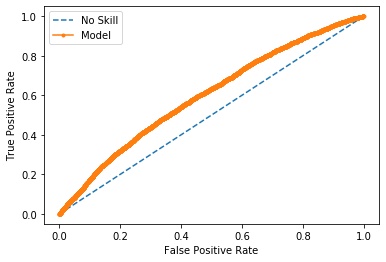

In [361]:
calculate_roc(y_test,y_preds[:,1])

#### Decision Tree

In [362]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [363]:
tree.fit(X_train_down,y_train_down)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [364]:
preds = tree.predict(X_test)
y_preds = tree.predict_proba(X_test)

In [365]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.71      0.61      0.66      8402
         1.0       0.45      0.57      0.50      4774

    accuracy                           0.59     13176
   macro avg       0.58      0.59      0.58     13176
weighted avg       0.62      0.59      0.60     13176



In [366]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, preds))

[[5093 3309]
 [2056 2718]]


No Skill: ROC AUC=0.500
Model: ROC AUC=0.619


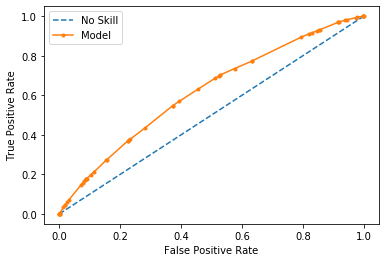

In [367]:
calculate_roc(y_test, y_preds[:,1])


In [368]:
columnas_entrenamiento = [x for x in df.columns if x != 'target2']

In [369]:
features = pd.DataFrame(list(zip(columnas_entrenamiento,tree.feature_importances_))).sort_values(by=1,ascending=False)[:10]

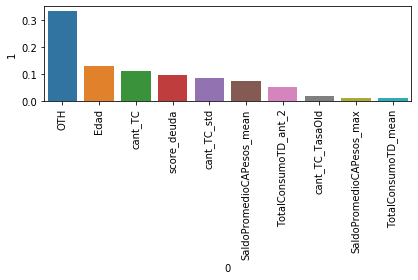

In [370]:
sns.barplot(features.loc[:,0],features.loc[:,1])
plt.xticks(rotation=90)
plt.tight_layout()

In [371]:
tree.get_depth()

6

### Random Forest

In [372]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

In [373]:
rfc

RandomForestClassifier(max_depth=4, random_state=42)

In [374]:
rfc.fit(X_train_down, y_train_down)

RandomForestClassifier(max_depth=4, random_state=42)

In [375]:
preds=rfc.predict(X_test)
y_preds = rfc.predict_proba(X_test)

In [376]:
print(classification_report(y_test,y_preds[:,1]>0.35))

              precision    recall  f1-score   support

         0.0       0.89      0.00      0.00      8402
         1.0       0.36      1.00      0.53      4774

    accuracy                           0.36     13176
   macro avg       0.63      0.50      0.27     13176
weighted avg       0.70      0.36      0.20     13176



In [377]:
print(confusion_matrix(y_test, preds))

[[4907 3495]
 [2053 2721]]


Text(0.5, 1.0, 'Predicción - RandomForest')

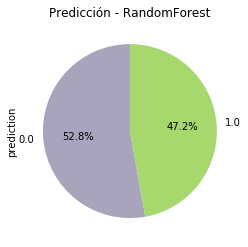

In [378]:
preds_rf = pd.DataFrame(preds)
preds_rf.columns = ['prediction']
colors = ['#a7a4bc', '#a7d86d']
ax = preds_rf['prediction'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)
ax.set_title('Predicción - RandomForest')

In [379]:
(y_preds[:,1]>0.35).sum()

13158

No Skill: ROC AUC=0.500
Model: ROC AUC=0.609


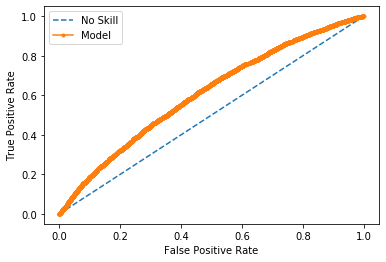

In [380]:
calculate_roc(y_test, y_preds[:,1])

In [381]:
rfc=RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=42)

In [382]:
preds=rfc.predict(X_test)
y_preds = rfc.predict_proba(X_test)

In [383]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.65      0.96      0.77      8402
         1.0       0.55      0.08      0.14      4774

    accuracy                           0.64     13176
   macro avg       0.60      0.52      0.46     13176
weighted avg       0.61      0.64      0.54     13176



No Skill: ROC AUC=0.500
Model: ROC AUC=0.621


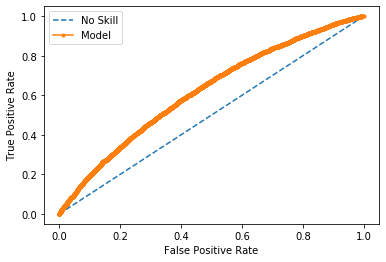

In [384]:
calculate_roc(y_test, y_preds[:,1])

### XGBoost

In [405]:
xgb_model = xgb.XGBClassifier()
xgbrf_model = xgb.XGBRFClassifier()

In [406]:
xgb_model.fit(X_train_down,y_train_down)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [407]:
xgbrf_model.fit(X_train_down,y_train_down)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [408]:
preds = xgb_model.predict(X_test)
y_preds = xgb_model.predict_proba(X_test)

Text(0.5, 1.0, 'Predicción - XGBoost')

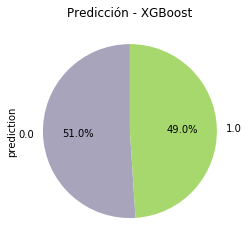

In [409]:
preds_xgb = pd.DataFrame(preds)
preds_xgb.columns = ['prediction']
colors = ['#a7a4bc', '#a7d86d']
ax = preds_xgb['prediction'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)
ax.set_title('Predicción - XGBoost')

In [410]:
print(classification_report(y_test,y_preds[:,1]>0.50))

              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69      8402
         1.0       0.50      0.68      0.58      4774

    accuracy                           0.64     13176
   macro avg       0.64      0.65      0.63     13176
weighted avg       0.68      0.64      0.65     13176



No Skill: ROC AUC=0.500
Model: ROC AUC=0.710


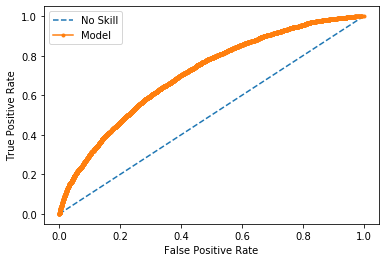

In [400]:
calculate_roc(y_test, y_preds[:,1])

In [401]:
preds = xgbrf_model.predict(X_test)
y_preds = xgbrf_model.predict_proba(X_test)

In [402]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65      8402
         1.0       0.45      0.58      0.51      4774

    accuracy                           0.59     13176
   macro avg       0.59      0.59      0.58     13176
weighted avg       0.62      0.59      0.60     13176



In [403]:
print(confusion_matrix(y_test, preds))

[[5040 3362]
 [1985 2789]]


No Skill: ROC AUC=0.500
Model: ROC AUC=0.630


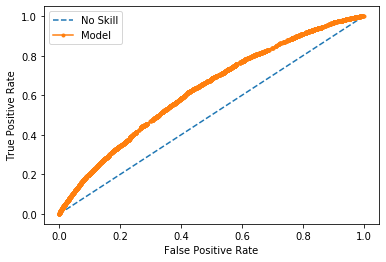

In [404]:
calculate_roc(y_test, y_preds[:,1])

## Probar con distintos hiperparámetros y con distintos umbrales

### Regresion Logistica


In [280]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

In [281]:
logreg = LogisticRegression()

In [282]:
# Create Hyperparameter Search Space

param_grid = { 
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1,1,4,10],
    'penalty': ['l1', 'l2']
}


In [283]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 2,n_jobs=6, verbose=5, max_iter=50)

TypeError: __init__() got an unexpected keyword argument 'max_iter'

In [284]:
# Fit randomized search
clf.fit(X_train_down, y_train_down)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done  28 out of  32 | elapsed:   49.4s remaining:    7.0s
[Parallel(n_jobs=6)]: Done  32 out of  32 | elapsed:  1.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=6,
             param_grid={'C': [0.1, 1, 4, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [247]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 4


In [248]:
# Predict Using Best Model
log_preds = best_model.predict(X_test)

In [249]:
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63      8412
         1.0       0.43      0.58      0.50      4742

    accuracy                           0.57     13154
   macro avg       0.57      0.57      0.56     13154
weighted avg       0.61      0.57      0.58     13154



### Decision Tree

In [286]:
rfc = DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,6,8,12]
}
CV_tree = GridSearchCV(estimator=tree, param_grid=param_grid,cv= 2,n_jobs=6, verbose=5)

In [287]:
CV_tree

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12]},
             pre_

In [288]:
CV_tree.fit(X_train_down, y_train_down)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   9 out of  16 | elapsed:    1.8s remaining:    1.4s
[Parallel(n_jobs=6)]: Done  13 out of  16 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    3.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12]},
             pre_

In [292]:
CV_tree.best_score_

0.5900079060998601

In [293]:
CV_tree.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [225]:
tree_preds = CV_tree.predict(X_test)

NameError: name 'CV_tree' is not defined

In [295]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62      8412
         1.0       0.44      0.66      0.53      4742

    accuracy                           0.58     13154
   macro avg       0.59      0.60      0.57     13154
weighted avg       0.63      0.58      0.59     13154



### XGBoost

In [447]:
xgb = XGBClassifier()

In [448]:
param_grid = {
         'max_depth':[3,4,5],
         'gamma': [2, 3],
         'colsample_bytree': [0.8, 1.0],
         'min_child_weight':[5,6,7]
        }

In [449]:
CV_xgb = GridSearchCV(xgb, param_grid=param_grid, n_jobs=6, 
                   cv=5,scoring='roc_auc', verbose=2)

In [ ]:
CV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.0min


In [443]:
CV_xgb.best_score_

0.6393983064062665

In [444]:
CV_xgb.best_params_

{'max_depth': 3, 'min_child_weight': 6}

In [445]:
xgb_preds = CV_xgb.predict(X_test)

In [446]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76      8402
         1.0       0.51      0.19      0.28      4774

    accuracy                           0.64     13176
   macro avg       0.59      0.54      0.52     13176
weighted avg       0.61      0.64      0.59     13176

